In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from numpy import matlib as mb
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt 
import statsmodels as sm
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

/home/mickael/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/mickael/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [3]:
def compute_pvalue_stat(X,y,nbVar):
    n,k = X.shape
    matriceGram = np.dot(np.transpose(X),X)
    matriceGram_inv = np.linalg.inv(matriceGram)
    beta = np.dot(np.dot(matriceGram_inv,np.transpose(X)),y)
    u = y - np.dot(X,beta)
    sig2 = np.dot(u.T,u)/(n-(nbVar)) #+1
    std = np.sqrt(np.diag(sig2*matriceGram_inv))
    t = beta/std
    SSR = np.dot(u.T,u)
    p_distrib = stats.t.cdf(abs(t) , n-(nbVar)) #+1
    p_value = (1 - p_distrib) * 2
    return beta, u, sig2, std, t, SSR, p_value

# Partie 1

## 1
1. Lire le fichier mroz.txt. Ne sélectionner que les observations pour lesquelles la variable wage
est strictement positive.

In [5]:
df.head(20)

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.354,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,.3285121,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49
5,1,2032,0,0,54,12,4.7421,4.70,1040,57,...,19495,0.6915,14,7,7.5,1,33,9.859054,1.55648,1089
6,1,1440,0,2,37,16,8.3333,5.95,2670,37,...,21152,0.6915,14,7,5.0,0,11,9.152048,2.12026,121
7,1,1020,0,0,54,12,7.8431,9.98,4120,53,...,18900,0.6915,3,3,5.0,0,35,10.900040,2.059634,1225
8,1,1458,0,2,48,12,2.1262,0.00,1995,52,...,20405,0.7515,7,7,3.0,0,24,17.305000,.7543364,576
9,1,1600,0,2,39,12,4.6875,4.15,2100,43,...,20425,0.6915,7,7,5.0,0,21,12.925000,1.544899,441


In [2]:
df = pd.read_csv('C://Users//Orion//Documents//MS-BGD//Econometrie//Data//swbook1_3e//textfiles/MROZ.raw', sep='\s+', header= None )
df = df.rename(columns={  0: 'inlf',
 1: 'hours',
 2: 'kidslt6',
 3: 'kidsge6',
 4: 'age',
 5: 'educ',
 6: 'wage',
 7: 'repwage',
 8: 'hushrs',
 9: 'husage',
10: 'huseduc',
11: 'huswage',
12: 'faminc',
13: 'mtr',
14: 'motheduc',
15: 'fatheduc',
16: 'unem',
17: 'city',
18: 'exper',
19: 'nwifeinc',
20: 'lwage',
21: 'expersq'})
df.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.354,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,.3285121,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49


In [11]:
print('Row before filtering:', df.shape[0])

dec_cols = ['lwage', 'huswage', 'wage']
for col in dec_cols:
    df[col] = [0. if w=='.' else float(w) for w in df[col]]
    
df_pos = df[df.wage > 0]
print('Row after keeping only positive values:', df_pos.shape[0])

Row before filtering: 753
Row after keeping only positive values: 428


## 2
2. Faire les statistiques descriptives du salaire, de l’age et de l’éducation pour l’ensemble des
femmes puis, pour les femmes dont le salaire du mari est supérieure à la médiane de
l’échantillon, puis pour les femmes dont le salaire du mari est inférieur à la médiane de
l’échantillon

## 3
3. Faire l'histogramme de la variable wage. Calculer le log de wage et faire l'histogramme.
Comparez les deux histogrammes et commentez

## 4
4. Calculer les corrélations motheduc et fatheduc. Commentez. Il y a-t-il un problème de
multicollinéarité si l'on utilise ces variables comme variables explicatives ?

## 5
5. Faites un graphique en nuage de point entre wage et educ, wage et exper, wage et fatheduc.
Commentez. S'agit-il d'un effet "toute chose étant égale par ailleurs ?"

## 6
6. Quelle est l'hypothèse fondamentale qui garanti des estimateurs non biaisés ? Expliquer le
biais de variable omise


## 7
7. Faire la régression de wage en utilisant les variables explicatives un constante, city, educ,
exper, nwifeinc, kidslt6, kidsgt6. Commentez l'histogramme des résidus.

## 8
8. Faire la régrssion de lwage sur une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6.
Comparer l’histogramme obtenu à celui de la question 7.

## 9
9. Tester l'hypothèse de non significativité de exper avec un seuil de significativité de 1%, 5% et
10% (test alternatif des deux côtés). Commentez les p-values.

## 10
10. Tester l’hypothèse que le coefficient associé à educ est égal à 10% avec un seuil de
significativité de 5% (test à alternatif des deux côtés)

## 11
11. Tester l’hypothèse jointe que le rendement de l’éducation est de 10% et que celui de
l’expérience professionnelle est de 5%.

## 12
12. De combien augmente le salaire en pourcentage avec 10 années d’expérience ?

## 13
13. Tester l’égalité des coefficients associés aux variables kidsgt6 et kidslt6. Interprétez.

## 14
14. En utilisant le modèle de la question 7, faire le test d'hétéroscédasticité de forme linéaire en
donnant la p-valeur. Corriger le problème par rapport à la variable la plus importante en
utilisant la méthode des MCG. Comparer les écarts-types des coefficients estimés avec ceux
obtenus à la question 7. Commenter.

## 15
15. Tester le changement de structure de la question 8 entre les femmes qui ont moins de 30
ans, entre 30 et 43 ans, plus de 43 ans (3 groupes mutuellement exclusifs). Donnez les pvaleurs.

## 16
16. A partir de la variable kidslt6, créer un ensemble de variables binaires pour le nombre
d’enfants de moins de 6 ans. Refaire la question 8 avec ces variables et en utilisant comme
référence les femmes qui ont des enfants de plus de 6 ans. Ces catégories sont-elles
mutuellement exclusives ? Interprétez les paramètres associés aux variables binaires. Faire le
test de non significativité de l’ensemble des variables binaires. Donnez les p-valeurs

## 17
17. A partir de l’échantillon global, faire une régression de inlf sur une constante, city, educ, age,
kidslt6, kidsgt6. Interprétez les coefficients estimés.

## 18
18. Estimer le modèle probit de inlf sur une constante, city, educ, age, kidslt6, kidsgt6. Faire le
test de non significativité jointes des coefficients associés à kidslt6 et à kidsgt6. Comparez le
résultat du test à celuir de la question 18.

## 19
19. Calculer les effets partiels pour l'ensemble des variables explicatives : p(y1)/xk (k = 1, ...,
K), où K est le nombre de variables explicatives. Comparer vos résultats à ceux obtenus à la
question 17. Commentez.

## 20
20. Faire le test de non significativité jointes des coefficients associés à kidslt6 et à kidsgt6 en
utilisant la méthode du rapport de vraisemblance. Comparez aux résultazts de la question 18.

# Partie 2

## 1
1. Importer les données du fichier quarterly.xls (corriger le problème éventuel d’observations
manquantes)

In [4]:
df = pd.read_excel('quarterly.xls', sep='\s+', index_col='DATE', parse_dates=True)
df.index = df.index.to_period("Q")
df.head(20)

,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
DATE,,,,,,,,,,,,,,,,,,
1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073
1961Q2,1.73,2.30,2.94,3.62,3.79,31.47,33.33,29.83,19.23,141.40,966.4,320.97,7.00,23.00,2869.6,2962.9,18.785,32.131
1961Q3,1.68,2.30,3.01,3.90,3.98,31.50,33.33,29.95,19.32,142.00,982.7,326.50,6.77,23.74,2915.9,2991.3,18.843,32.699
1961Q4,2.40,2.46,3.10,3.84,3.97,31.53,33.37,29.99,19.37,146.63,1000.0,334.70,6.20,24.57,2975.3,3019.9,18.908,33.421
1962Q1,2.46,2.72,3.21,3.84,4.02,31.70,33.53,30.11,19.44,146.37,1020.7,341.17,5.63,24.94,3028.7,3048.7,19.020,33.136


In [5]:
print('Is there null values:', df.isnull().values.any())
print('Is there na values:', df.isna().values.any())

Is there null values: False
Is there na values: False


## 2
2. Calculer inf, le taux d’inflation à partir de la variable CPI. Faire un graphique dans le temps de
inf. Commentez.

In [6]:
df['Inf'] = ((df.CPI-df.CPI.shift())/(df.CPI.shift()))*100

In [7]:
df[['CPI',"Inf"]].head()

,CPI,Inf
DATE,,
1960Q1,29.40,NaN
1960Q2,29.57,0.578231
1960Q3,29.59,0.067636
1960Q4,29.78,0.642109
1961Q1,29.84,0.201478


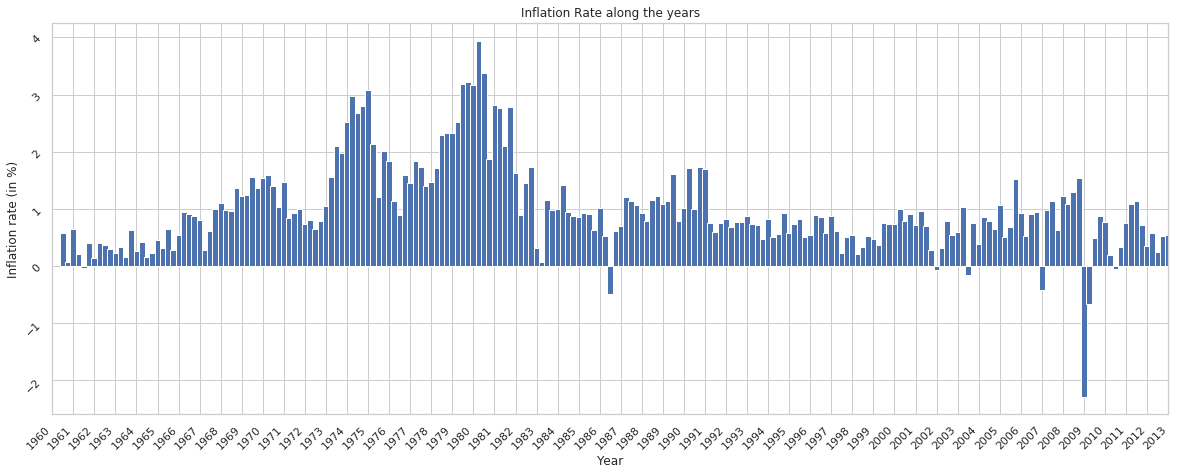

In [8]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator((1,4,7,10))  # every month
yearsFmt = mdates.DateFormatter('%Y')

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.

fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df.index.values.astype('datetime64[D]'),df['Inf'].values, width = 100)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years...
datemin = np.datetime64(df.index.values.astype('datetime64[D]')[0], 'Y')
datemax = np.datetime64(df.index.values.astype('datetime64[D]')[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
ax.tick_params(labelrotation=45)
plt.title("Inflation Rate along the years")
plt.xlabel('Year')
plt.ylabel("Inflation rate (in %)")
plt.show()

In [ ]:
# Comment

## 3 Interpréter l'autocorrélogramme et l'autocorrélogrammes partiels de inf. Quelle est la différence entre ces deux graphiques ?

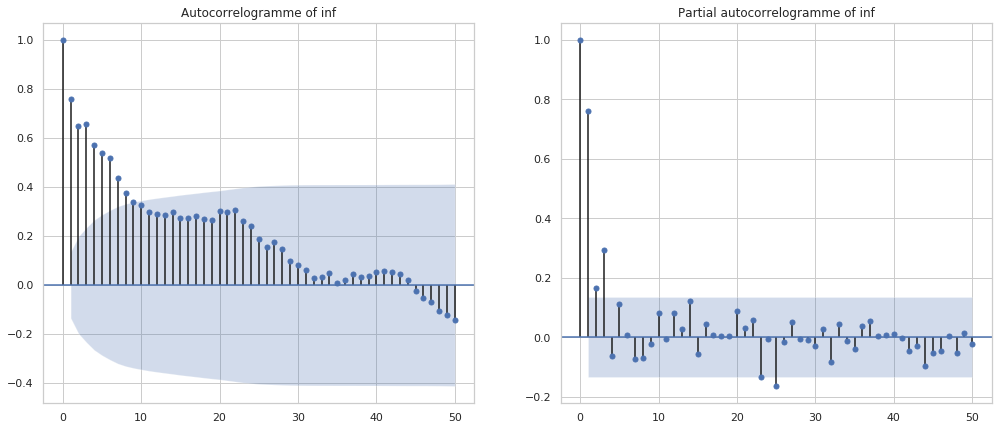

In [10]:
# import statsmodels.api as sm
fig, axes = plt.subplots(1, 2, figsize=(17,7))
fig = plot_acf(df['Inf'].values[1:],ax=axes[0], lags = 50)
axes[0].set_title("Autocorrelogramme of inf")
fig = plot_pacf(df['Inf'].values[1:], ax=axes[1], lags = 50)
axes[1].set_title("Partial autocorrelogramme of inf")
plt.show()

In [345]:
# Comment difference

## 4. Quelle est la différence entre la stationnarité et l'ergodicité ? Pourquoi a-t-on besoin de ces deux conditions. Expliquez le terme "spurious regression".

A process is said "ergodic" when the initial condition does not influence the inference

A process is said "stationary" if f(Z1,Z2,..,Zt) and f(Z1+k,Z2+k,..,Zt+k) follows the same law. We talk of weak stationarity when the mean and variance is finite and constant through time but also when the autocorellation between Zt and ZT-k does not depend of the time shift.

We need ergodicity and stationarity (and finite variance) to make inference using the data

"spurious regression" is the situation were we use the properties of a stationary serie on a non stationary one. It gives fake results, often too optimistic and can make think of correlation between variables when there is none.

## 5 .Proposer une modélisation AR(p) de inf, en utilisant tous les outils vus au cours

A revoir

In [11]:
# test
"""ar=sm.tsa.ar_model.AR(np.array(df_inf)).fit()
print ('AIC: ',ar.aic)
print ('BIC: ', ar.bic)
print ('params: ',ar.params)"""

"ar=sm.tsa.ar_model.AR(np.array(df_inf)).fit()\nprint ('AIC: ',ar.aic)\nprint ('BIC: ', ar.bic)\nprint ('params: ',ar.params)"

In [13]:
list_bic = []
list_aic = []
lag = 40

for i in range(0, lag):
    res = sm.tsa.ar_model.AR(df['Inf'][1:]).fit(i)
    list_aic.append(res.aic)
    list_bic.append(res.bic)

min_degree_aic = list_aic.index(min(list_aic))
min_degree_bic = list_bic.index(min(list_bic))
degree =  min([min_degree_aic, min_degree_bic])
print('Degree minimum for bic: ', min_degree_bic)
print('Degree minimum for aic: ', min_degree_aic)
print('Degree selected: ', degree, ', method:', 'bic' if min_degree_bic < min_degree_aic else 'aic')


Degree minimum for bic:  3
Degree minimum for aic:  3
Degree selected:  3 , method: aic


## 6 Estimer le modèle de la courbe de Philips qui explique le taux de chômage (Unemp) en fonction du taux d’inflation courant et une constante.

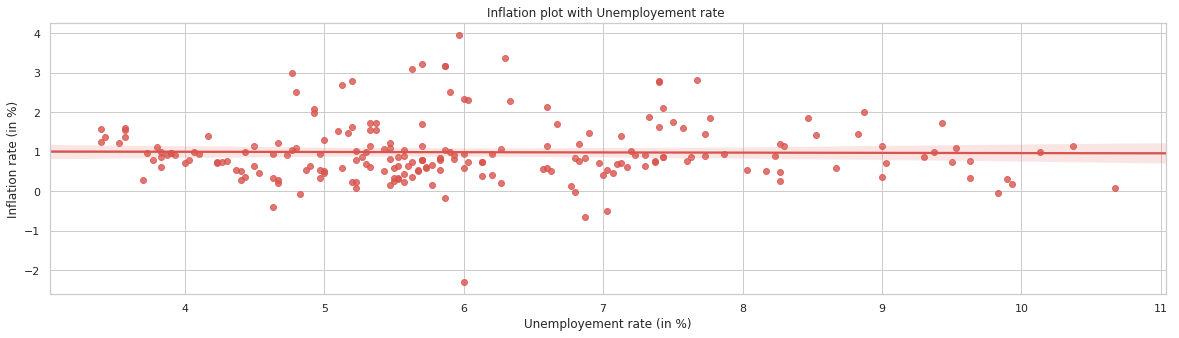

In [36]:
# Plot Phillips 
plt.figure(figsize = (20,5))
sns.regplot(x= df["Unemp"].shift() , y=df["Inf"].values, color= sns.xkcd_rgb['pale red'])
# plt.scatter(df["Unemp"].shift(), df["Inf"].values, color = sns.xkcd_rgb['pale red'], s = 10)
plt.ylabel("Inflation rate (in %)")
plt.xlabel("Unemployement rate (in %)")
plt.title("Inflation plot with Unemployement rate ")
plt.show()

In [248]:
# Test 1
n,p = df.shape
const = np.ones((n-1,1))
X = np.c_[const,df_inf['inf'].values]
Y = df['Unemp'].values[1:]
beta, u, sig2, std, t, SSR, p_value = compute_pvalue_stat(X, Y, 1)
print("Beta ", beta)
print("Sigma 2 ", sig2)
print("Standart deviation ", std)
print("Tstat ", t)


#(beta, sig2, std, t, SSR, p_value)

Beta  [6.07081892 0.01590799]
Sigma 2  2.614191077769387
Standart deviation  [0.18037738 0.14405741]
Tstat  [33.65620922  0.11042811]


In [250]:
lr = LinearRegression()
lr.fit(X, Y)
print("Beta ", lr.coef_)
print("Intercept ", lr.intercept_)


Beta  [0.         0.01590799]
Intercept  6.070818917241153


## 7
7. Tester l’autocorrélation des erreurs.

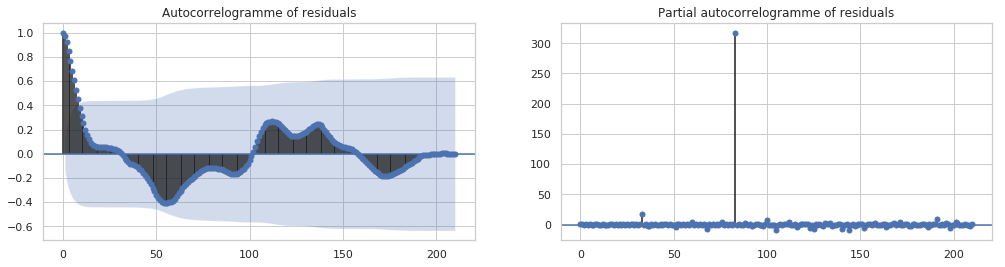

In [252]:

residuals = Y - lr.predict(X)

fig, axes = plt.subplots(1, 2, figsize=(17,4))
fig = sm.graphics.tsaplots.plot_acf(residuals,ax=axes[0])
axes[0].set_title("Autocorrelogramme of residuals")
fig = sm.graphics.tsaplots.plot_pacf(residuals, ax=axes[1])
axes[1].set_title("Partial autocorrelogramme of residuals")
plt.show()

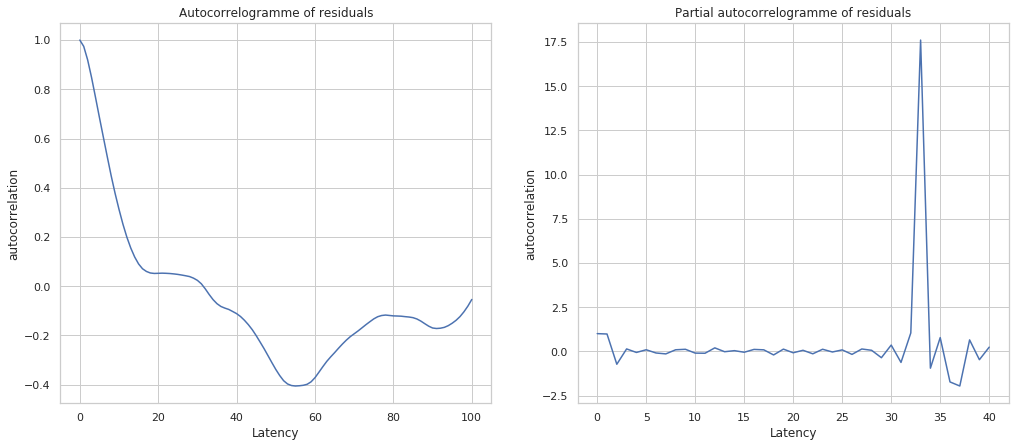

In [253]:
_, axes = plt.subplots(1, 2, figsize=(17,7))

axes[0].plot(sm.tsa.stattools.acf(residuals, nlags = 100))
axes[0].set_ylabel("autocorrelation")
axes[0].set_title("Autocorrelogramme of residuals")
axes[0].set_xlabel("Latency")

axes[1].plot(sm.tsa.stattools.pacf(residuals))
axes[1].set_ylabel("autocorrelation")
axes[1].set_title("Partial autocorrelogramme of residuals")
axes[1].set_xlabel("Latency")

plt.show()

In [256]:
# X_res = np.c_[np.ones((X.shape[0],1)),X]
beta_res, u_res, sig2_res, std_res, t_res, SSR_res, p_valu_res = compute_pvalue_stat(X, pd.DataFrame(residuals), 2)
t_res


# Comment

array([[2.99341042e-15, 3.74811368e-15],
       [1.91885283e-17, 2.40263698e-17]])

## 8
8. Corriger l’autocorrélation des erreurs par la méthode vue en cours.

In [259]:
X_corrected = X.copy()
n, k = X_corrected.shape
for i in range(k):
    X_corrected[:,i] = X_corrected[:,i]/np.sqrt(df["Unemp"].iloc[1:])


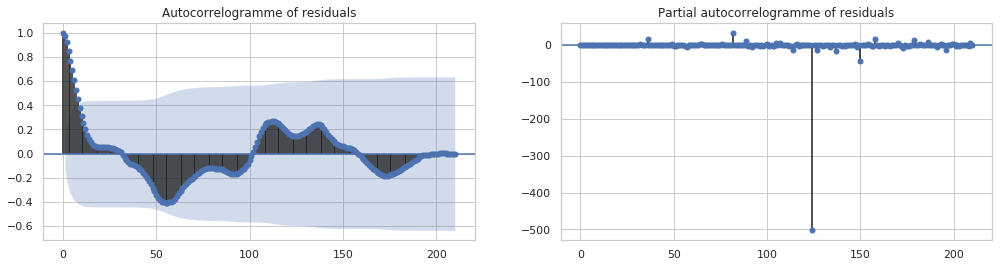

In [261]:

residuals = Y - lr.predict(X_corrected)

fig, axes = plt.subplots(1, 2, figsize=(17,4))
fig = sm.graphics.tsaplots.plot_acf(residuals,ax=axes[0])
axes[0].set_title("Autocorrelogramme of residuals")
fig = sm.graphics.tsaplots.plot_pacf(residuals, ax=axes[1])
axes[1].set_title("Partial autocorrelogramme of residuals")
plt.show()

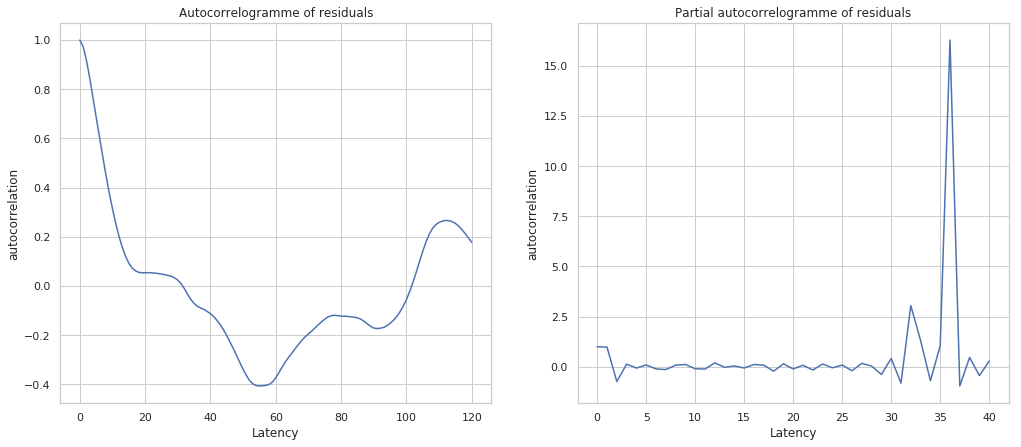

In [262]:
_, axes = plt.subplots(1, 2, figsize=(17,7))

axes[0].plot(sm.tsa.stattools.acf(residuals, nlags = 120))
axes[0].set_ylabel("autocorrelation")
axes[0].set_title("Autocorrelogramme of residuals")
axes[0].set_xlabel("Latency")

axes[1].plot(sm.tsa.stattools.pacf(residuals))
axes[1].set_ylabel("autocorrelation")
axes[1].set_title("Partial autocorrelogramme of residuals")
axes[1].set_xlabel("Latency")

plt.show()

## 9
9. Tester la stabilité de la relation chômage-inflation sur deux sous-périodes de taille identique.

In [263]:
def compute_pvalue_stat(X,y,nbVar):
    n,k = X.shape
    matriceGram = np.dot(np.transpose(X),X)
    matriceGram_inv = np.linalg.inv(matriceGram)
    beta = np.dot(np.dot(matriceGram_inv,np.transpose(X)),y)
    u = y - np.dot(X,beta)
    sig2 = np.dot(u.T,u)/(n-(nbVar)) #+1
    std = np.sqrt(np.diag(sig2*matriceGram_inv))
    t = beta/std
    SSR = np.dot(u.T,u)
    p_distrib = stats.t.cdf(abs(t) , n-(nbVar)) #+1
    p_value = (1 - p_distrib) * 2
    return beta, u, sig2, std, t, SSR, p_value

In [268]:
#X =  np.c_[const,df[["CPI","Unemp"]].values]
n,k = df.shape
const = np.ones((n,1))

X0 = np.c_[const,df["CPI"].values]
X1 = np.c_[const]
beta_OLS, u_OLS, sig2_OLS, std_OLS, t_OLS, SSR_OLS, p_value_OLS = compute_pvalue_stat(X0, df["Unemp"], 2)
beta_OLS2, u_OLS2, sig2_OLS2, std_OLS2, t_OLS2, SSR_OLS2, p_value_OLS2 = compute_pvalue_stat(X1, df["Unemp"], 2)


F:  8.403016350781146e+16


## 10
10. Faites les tests changement de structure de Chow et détecter le point de rupture.

In [269]:
def compute_pvalue_stat(X,y,nbVar):
    n,k = X.shape
    matriceGram = np.dot(np.transpose(X),X)
    matriceGram_inv = np.linalg.inv(matriceGram)
    beta = np.dot(np.dot(matriceGram_inv,np.transpose(X)),y)
    u = y - np.dot(X,beta)
    sig2 = np.dot(u.T,u)/(n-(nbVar)) #+1
    std = np.sqrt(np.diag(sig2*matriceGram_inv))
    t = beta/std
    SSR = np.dot(u.T,u)
    p_distrib = stats.t.cdf(abs(t) , n-(nbVar)) #+1
    p_value = (1 - p_distrib) * 2
    return beta, u, sig2, std, t, SSR, p_value

In [271]:
#X =  np.c_[const,df[["CPI","Unemp"]].values]
n,k = df.shape
const = np.ones((n,1))

X0 = np.c_[const,df["CPI"].values]
X1 = np.c_[const]
beta_OLS, u_OLS, sig2_OLS, std_OLS, t_OLS, SSR_OLS, p_value_OLS = compute_pvalue_stat(X0, df["Unemp"], 2)
beta_OLS2, u_OLS2, sig2_OLS2, std_OLS2, t_OLS2, SSR_OLS2, p_value_OLS2 = compute_pvalue_stat(X1, df["Unemp"], 2)


In [277]:
ssr0 = residuals.dot(u_OLS[1:])
ddl0 = X0.shape[0] - X0.shape[1]
# modèle contraint
ssr1 = residuals.dot(u_OLS2[1:])
ddl1 = X1.shape[0] - X1.shape[1]

F = ((ssr1-ssr0)/ssr0)*(ddl0/(ddl1-ddl0))
print("F: ", F)

F:  9.692328727065055


In [ ]:
##

## 11
11. Estimer la courbe de Philips en supprimant l'inflation courante des variables explicatives mais
en ajoutant les délais d’ordre 1, 2, 3 et 4 de l’inflation et du chômage. Faire le test de
Granger de non causalité de l’inflation sur le chômage. Donnez la p-valeur.

In [349]:
import statsmodels.formula.api as smf

cpi_lag1 = df["CPI"].shift(1).reset_index(drop=True)
cpi_lag2 = df["CPI"].shift(2).reset_index(drop=True)
cpi_lag3 = df["CPI"].shift(3).reset_index(drop=True)
cpi_lag4 = df["CPI"].shift(4).reset_index(drop=True)

unem_lag1 = df["Unemp"].shift(1).reset_index(drop=True)
unem_lag2 = df["Unemp"].shift(2).reset_index(drop=True)
unem_lag3 = df["Unemp"].shift(3).reset_index(drop=True)
unem_lag4 = df["Unemp"].shift(4).reset_index(drop=True)

y = df["Unemp"].reset_index(drop=True)
## A VERIF LE Y

In [350]:
formula = 'y ~ unem_lag1 + unem_lag2 + unem_lag3 + unem_lag4'
def_df1 = pd.DataFrame(np.c_[y, unem_lag1, unem_lag2, unem_lag3, unem_lag4])

model = smf.ols(formula, data=def_df1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     2178.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):          1.89e-165
Time:                        15:38:16   Log-Likelihood:                -2.5235
No. Observations:                 208   AIC:                             15.05
Df Residuals:                     203   BIC:                             31.73
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2157      0.071      3.045      0.0

In [351]:
formula2 = 'y ~ cpi_lag1 + cpi_lag2 + cpi_lag3 + cpi_lag4'
def_df = pd.DataFrame(np.c_[y, cpi_lag1, cpi_lag2, cpi_lag3, cpi_lag4])

model2 = smf.ols(formula2, data=def_df)
results2 = model2.fit()
print(results2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     2.916
Date:                Wed, 17 Apr 2019   Prob (F-statistic):             0.0224
Time:                        15:39:10   Log-Likelihood:                -390.06
No. Observations:                 208   AIC:                             790.1
Df Residuals:                     203   BIC:                             806.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3842      0.244     22.093      0.0

## 12
12. Représentez graphiquement les délais distribués et commentez. Calculer l’impact à long de
terme de l’inflation sur le chômage.

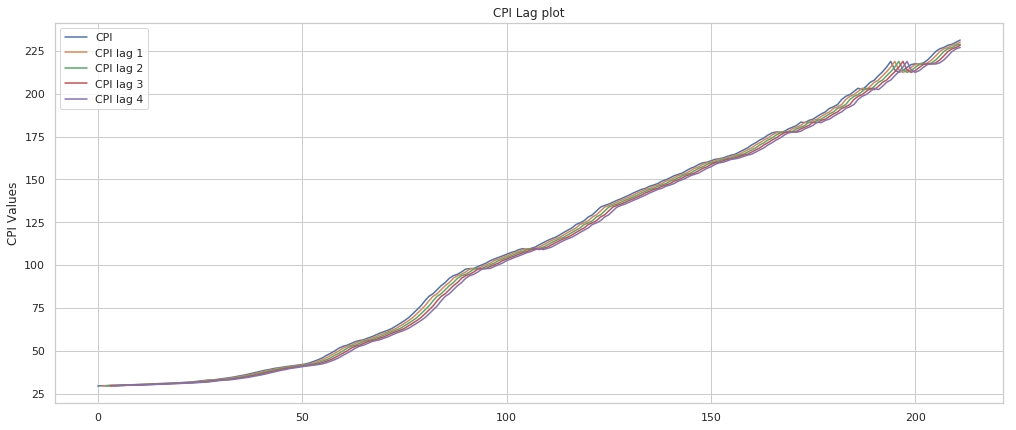

In [358]:
plt.figure(figsize=(17,7))
plt.plot(df["CPI"].reset_index(drop=True),label="CPI")
plt.plot(cpi_lag1,label="CPI lag 1")
plt.plot(cpi_lag2,label="CPI lag 2")
plt.plot(cpi_lag3,label="CPI lag 3")
plt.plot(cpi_lag4,label="CPI lag 4")
plt.ylabel("CPI Values")
plt.title("CPI Lag plot")
plt.legend()
plt.show()


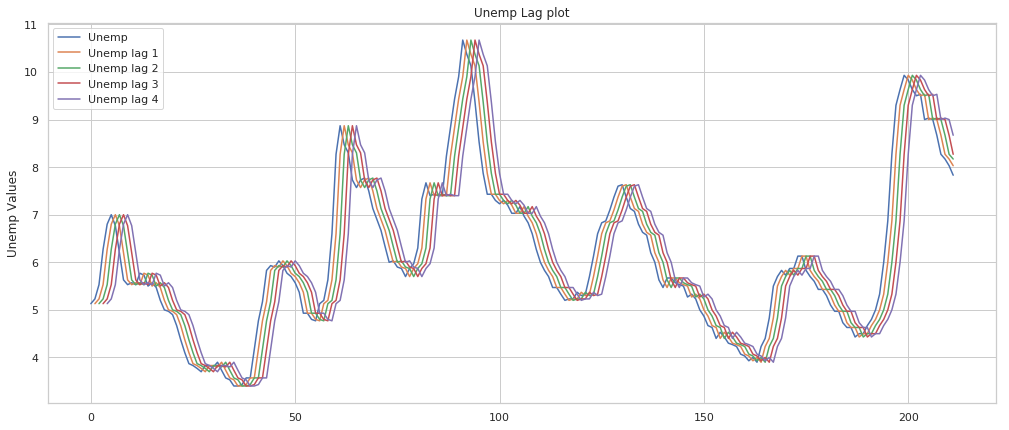

In [359]:
plt.figure(figsize=(17,7))
plt.plot(df["Unemp"].reset_index(drop=True),label="Unemp")
plt.plot(unem_lag1,label="Unemp lag 1")
plt.plot(unem_lag2,label="Unemp lag 2")
plt.plot(unem_lag3,label="Unemp lag 3")
plt.plot(unem_lag4,label="Unemp lag 4")
plt.ylabel("Unemp Values")
plt.title("Unemp Lag plot")
plt.legend()
plt.show()